Assignment #2 
Derivation of solar differential rotation from measuring sunspot positions
Team members

Valerii Serpiva MSC1 Space and engineering system. 
Valerii.Serpiva@skoltech.ru

Daniel Kekere Engineering systems. 
daniel.kekere@skoltech.ru 

In [2]:
import scipy as sp
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Counstant
pi = np.pi
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

#The Planck function calculation
def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(k*T)
    intensity = a/ ( (wav**5) * (np.exp(b/wav) - 1.0) )
    return intensity

In [6]:
#----STEP1____
#The temperature 𝑇 and #wavelengths λ is free input parameters to the function.
#input temperature in Kelvin
T_input = float(input())
#input wavelengths in nanometer
wave_input = float(input())

intensity_input = planck(wave_input, T_input)
print('T =', T_input, 'K', 'wavelengths =', wave_input, 'nm')
print('Intensity =', '{0:.4}'.format(intensity_input) , '[W/(m**2 * sr * m)]')

 4000
 500


T = 4000.0 K wavelengths = 500.0 nm
Intensity = 5.299e-22 [W/(m**2 * sr * m)]


 5000


Input temp = 5000.0 K


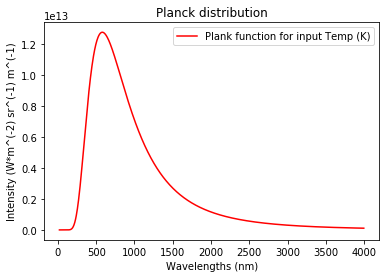

In [7]:
#ploting plunk function for input temperature in Kelvin
T = float(input())
print('Input temp =', T, 'K')

#wavelengths range from 20 nm to 4000 nm, step 5nm
wavelengths = np.arange(20e-9, 4e-6, 5e-9)

intensity = planck(wavelengths, T)
plt.title('Planck distribution')
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Intensity (W*m^(-2) sr^(-1) m^(-1)')
plt.plot(wavelengths*1e9, intensity, 'r-')
plt.legend(['Plank function for input Temp (K)'])
plt.show()

In [8]:
#----STEP2----
#Calculating and ploting the Planck function for three stars of different temperatures,
#including our Sun (𝑇 = 4000 K, 5772 K, 8000 K),
#given temperature
T1 = 4000
T_sun = 5772
T3 = 8000
#https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python4_DataAnalysis.html

#the wavelengths range from 20 nm to 4000 nm, in steps of 5 nm.
wavelengths_plot = np.arange(20e-9, 4000e-9, 5e-9) 

intensity1 = planck(wavelengths_plot, T1)
intensity2 = planck(wavelengths_plot, T_sun)
intensity3 = planck(wavelengths_plot, T3)

#analuze grafs to find max velue
def max_of_funk(wavelengths, a):
    max = a[0]
    pos = 0
    for i in range(len(a)):
        if a[i]>max: max=a[i];pos=i
        #print ("intensity=",max,"wavelengths=",wavelengths[pos],", pos=",pos)
    return (wavelengths[pos], max)

#searching the max of wavelengths for each function
max_wave1, max_intensity1 = max_of_funk(wavelengths_plot, intensity1)
max_wave2, max_intensity2 = max_of_funk(wavelengths_plot, intensity2)
max_wave3, max_intensity3 = max_of_funk(wavelengths_plot, intensity3)

print('Temp =', T1, 'K','max_wave1 =', '{0:.10}'.format(max_wave1*1e+9), 'nm ', 'intensity1 =', '{0:.3}'.format(max_intensity1))
print('Temp =', T_sun, 'K','max_wave2 =','{0:.10}'.format(max_wave2*1e+9), 'nm ', 'intensity2 =','{0:.3}'.format(max_intensity2))
print('Temp =', T3, 'K','max_wave3 =','{0:.10}'.format(max_wave3*1e+9), 'nm ', 'intensity3 =','{0:.3}'.format(max_intensity3))


Temp = 4000 K max_wave1 = 725.0 nm  intensity1 = 4.18e+12
Temp = 5772 K max_wave2 = 505.0 nm  intensity2 = 2.61e+13
Temp = 8000 K max_wave3 = 365.0 nm  intensity3 = 1.34e+14


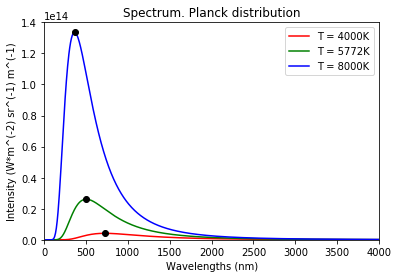

In [9]:
#ploting the results
plt.title('Spectrum. Planck distribution')
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Intensity (W*m^(-2) sr^(-1) m^(-1)')
plt.axis([0, 4000, 0, 1.4e14])  # [xmin, xmax, ymin, ymax]
plt.plot(wavelengths_plot*1e9, intensity1, 'r-')# 4000K red line
plt.plot(wavelengths_plot*1e9, intensity2, 'g-')# 5772K green line
plt.plot(wavelengths_plot*1e9, intensity3, 'b-')# 8000K blue line
plt.legend(['T = 4000K','T = 5772K','T = 8000K'])
plt.plot(max_wave1*1e9, max_intensity1, color='black', marker='o') 
plt.plot(max_wave2*1e9, max_intensity2, color='black', marker='o') 
plt.plot(max_wave3*1e9, max_intensity3, color='black', marker='o') 
plt.show()

In [11]:
#---step3---
#Wien’s displacement law
b = 2.898e-3
max_wave1_teor = b/T1
max_wave2_teor = b/T_sun
max_wave3_teor = b/T3

#comparation
print('Plank function ', ' Wien’s displacement law')
print('{0:.10}'.format(max_wave1*1e9), 'nm', '\t', '{0:.4}'.format(max_wave1_teor*1e9), 'nm')
print('{0:.10}'.format(max_wave2*1e9), 'nm', '\t', '{0:.4}'.format(max_wave2_teor*1e9), 'nm')
print('{0:.10}'.format(max_wave3*1e9), 'nm', '\t', '{0:.4}'.format(max_wave3_teor*1e9), 'nm')


Plank function   Wien’s displacement law
725.0 nm 	 724.5 nm
505.0 nm 	 502.1 nm
365.0 nm 	 362.2 nm


In [18]:
#----step4----
#the wavelengths range from 1 nm to 1000000 nm, in steps of 5 nm.
wavelengths_integrate = np.arange(1e-9, 1000000e-9, 1e-9)

T4 = 12000
intensity1_integrate = planck(wavelengths_integrate, T1)
intensity2_integrate = planck(wavelengths_integrate, T_sun)
intensity3_integrate = planck(wavelengths_integrate, T3)
intensity4_integrate = planck(wavelengths_integrate, T4)


flux1 = sum(intensity1_integrate)
flux_sun = sum(intensity2_integrate)
flux3 = sum(intensity3_integrate)
flux4 = sum(intensity4_integrate)


print('Emissivity of a completely black body for 3 stars')
print('T1 = 4000', '\t', '{0:.5}'.format(flux1), 'W m^(−2)sr^(−1)')
print('T1 = 5772', '\t', '{0:.5}'.format(flux_sun), 'W m^(−2)sr^(−1)')
print('T1 = 8000', '\t', '{0:.5}'.format(flux3), 'W m^(−2)sr^(−1)')
print('T1 = 12000', '\t', '{0:.5}'.format(flux4), 'W m^(−2)sr^(−1)')
print()

print('flux4/flux1','{0:.5}'.format(flux4/flux1))
print('flux3/flux1','{0:.5}'.format(flux3/flux1))


Emissivity of a completely black body for 3 stars
T1 = 4000 	 4.6057e+15 W m^(−2)sr^(−1)
T1 = 5772 	 1.9969e+16 W m^(−2)sr^(−1)
T1 = 8000 	 7.3692e+16 W m^(−2)sr^(−1)
T1 = 12000 	 3.7306e+17 W m^(−2)sr^(−1)

flux4/flux1 81.0
flux3/flux1 16.0
